##  Exploring Vienna General Hospital data from 1841 to 1846, depicting the importance of hand washing
<p>This project analyzes the data that made Doctor Ignaz Semmelweis of Vienna General Hospital, discover the importance of <em>handwashing</em>.</p>
<p>Born in 1857, Dr Semmelweis observed 

<p>Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital. </p>

In [1]:
#importing modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


##  The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. It is noticable that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [5]:
#calculate proportions of deaths per births
yearly['proportion_deaths'] = yearly['deaths']/ yearly['births']

#we can also visulaize the proportion of death and other insights from the two clinics
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

In [6]:
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [7]:
clinic_2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


<p>We can see the difference between the proportion of deaths between the two clinics. To accurately visualize the differences, we can plot some charts </p>

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

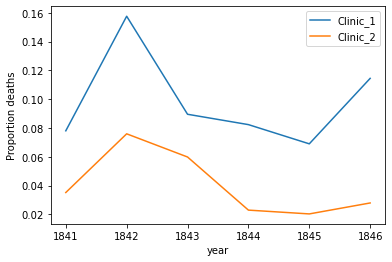

In [8]:
#plot yearly proportions of death across the two clinics
ax = clinic_1.plot( x = "year", y = "proportion_deaths",label = "Clinic_1")
clinic_2.plot(x = "year", y = "proportion_deaths", ax = ax, label = 'Clinic_2', ylabel = "Proportion deaths")

<p>Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed.</p>
<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [9]:
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates = ['date'])
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']


In [10]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


##  The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

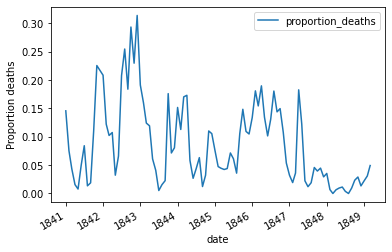

In [11]:
ax  = monthly.plot(x = "date", y = "proportion_deaths", ylabel = "Proportion deaths")

##  The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

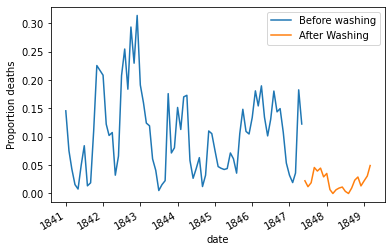

In [12]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax  = before_washing.plot(x = 'date', y = 'proportion_deaths', label = 'Before washing')
after_washing.plot(x = 'date', y = 'proportion_deaths', ax = ax, label = 'After Washing',  ylabel = 'Proportion deaths')

##  More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect.</p>

In [13]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

##  A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [14]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac= 1, replace = True)
    boot_after = after_proportion.sample(frac = 1, replace = True)
    boot_mean_diff.append(boot_before.mean() - boot_after.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067053
0.975    0.101360
dtype: float64

<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>